In [640]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [641]:
games = pd.read_csv('https://raw.githubusercontent.com/DanielaHdzS/Proyecto6/main/games.csv')
print(games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [642]:
games.columns = games.columns.str.lower() 
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [643]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [644]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [646]:
games['user_score'] = games['user_score'].dropna()
games['user_score'] = games['user_score'].replace('tbd',11.0)
print(games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 11.0 '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Para poder trabajar con el tipo de dato float, considere cambiar tbd por un numero que estuviera fuera del rango para poder diferenciarlo del resto, hice lo mismo para los datos NaN

In [648]:
games['year_of_release'] = games['year_of_release'].fillna(1979)

Los valores ausentes se rellenaron con valores en cero, el unico que no lo considere asi fue el de year_of_release, esto debido a que si lo pongo en cero, el dato estaria muy sesgado, lo cual haria que la informacion que se presente graficamente o visualmente estuviera muy limitada.

In [649]:
games['name'] = games['name'].astype(str)
games['platform'] = games['platform'].astype(str)
games['year_of_release'] = games['year_of_release'].astype(int)
games['genre'] = games['genre'].astype(str)
games['user_score'] = games['user_score'].astype(float)
games['rating'] = games['rating'].astype(str)

In [ ]:
games['sum_total'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  sum_total  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1      3.58      6.81         0.77           NaN        11.0    nan      40.24  
2     12.76      3.79         3.29          82.0         8.3      E      35.52  
3     10.93      3.28         2.95          80.0         8.0      E      32.77  
4      8.89     10.22         1.00           NaN        11.0    nan      31.38  


In [ ]:
list_sales = ['na_sales','eu_sales','jp_sales','other_sales','sum_total']
games_year=games.groupby('year_of_release')[list_sales].sum()
games_year=games_year.reset_index()
games_year = games_year.sort_values(by='sum_total', ascending=False)
print(games_year)

    year_of_release  na_sales  eu_sales  jp_sales  other_sales  sum_total
29             2008    348.69    181.14     60.25        81.42     671.50
30             2009    335.55    187.94     61.89        73.44     658.82
28             2007    309.89    157.82     60.29        76.75     604.75
31             2010    300.65    171.42     59.49        58.57     590.13
27             2006    262.13    127.89     73.74        53.95     517.71
32             2011    238.79    162.97     53.07        52.75     507.58
26             2005    242.15    121.11     54.27        40.29     457.82
25             2004    222.51    107.28     41.65        47.24     418.68
23             2002    216.19    109.75     41.76        27.27     394.97
34             2013    153.65    121.55     47.69        38.35     361.24
24             2003    193.61    103.81     34.20        25.92     357.54
33             2012    153.26    114.59     51.80        36.19     355.84
35             2014    132.27    122.7

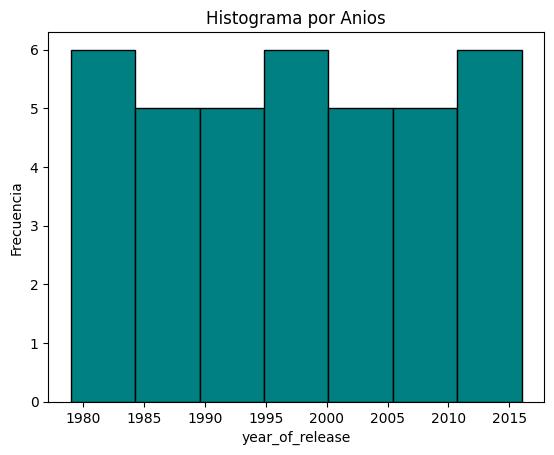

In [ ]:
plt.hist(games_year['year_of_release'], bins=7, color='teal', edgecolor='black')
plt.xlabel('year_of_release')
plt.ylabel('Frecuencia')
plt.title('Histograma por Anios')
plt.show()

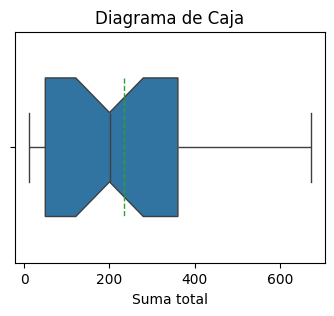

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=games_year['sum_total'],width=0.6, showmeans=True, meanline=True ,notch=True)
plt.xlabel('Suma total')
plt.title('Diagrama de Caja')
plt.show()

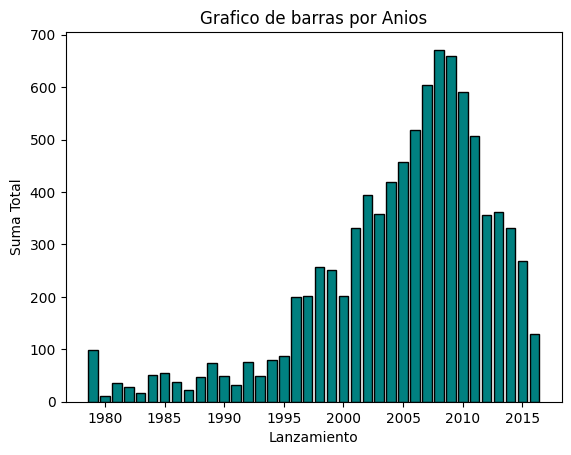

In [ ]:
plt.bar(games_year['year_of_release'],games_year['sum_total'], color='teal', edgecolor='black')
plt.xlabel('Lanzamiento')
plt.ylabel('Suma Total')
plt.title('Grafico de barras por Anios')
plt.show()

Se realizo una agrupacion por años de las ventas totales que se obtuvieron en todas las regiones (na,eu,jp y otros), en la grafica de barras podemos ver que el incremento en las ventas empezo 2004 alcanzo su mayor punto en el 2008, de ahi fue bajando gradualmente.

In [ ]:
games_platform = games.groupby('platform')[list_sales].sum()
games_platform = games_platform.reset_index().sort_values(by='sum_total', ascending=False)
print(games_platform)

   platform  na_sales  eu_sales  jp_sales  other_sales  sum_total
16      PS2    583.84    339.29    139.20       193.44    1255.77
28     X360    602.47    270.76     12.43        85.76     971.42
17      PS3    393.49    330.29     80.19       135.68     939.65
26      Wii    496.90    262.21     69.33        79.07     907.51
4        DS    382.40    188.89    175.57        59.26     806.12
15       PS    336.52    213.61    139.82        40.91     730.86
6       GBA    187.54     75.25     47.33         7.73     317.85
18      PS4    108.74    141.09     15.96        48.35     314.14
19      PSP    109.17     66.68     76.78        41.42     294.05
13       PC     94.53    142.44      0.17        22.38     259.52
2       3DS     83.49     61.48    100.67        13.36     259.00
29       XB    186.69     60.95      1.38         8.72     257.74
5        GB    114.32     47.82     85.12         8.20     255.46
11      NES    125.94     21.15     98.65         5.31     251.05
10      N6

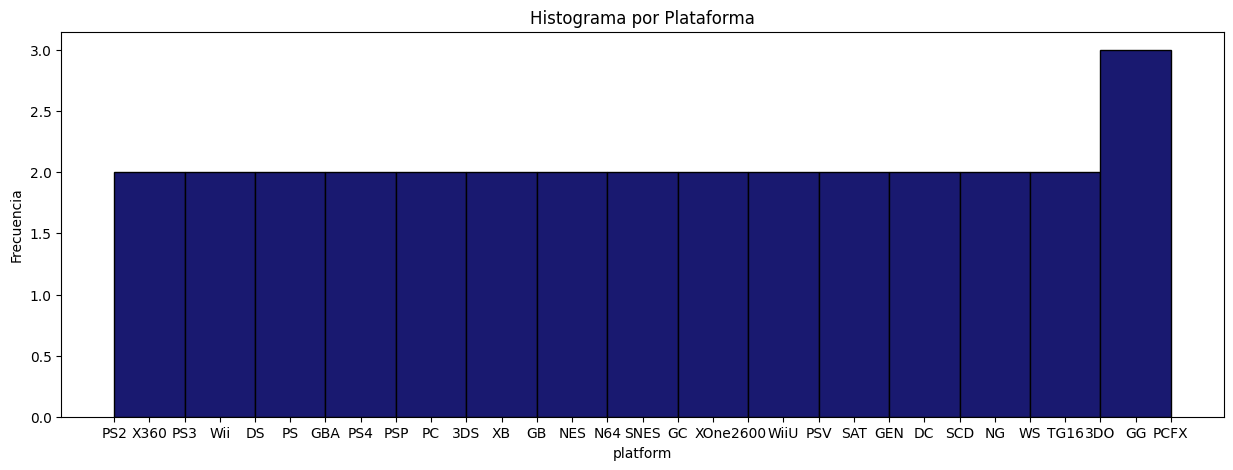

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(games_platform['platform'], bins=15, color='midnightblue', edgecolor='black')
plt.xlabel('platform')
plt.ylabel('Frecuencia')
plt.title('Histograma por Plataforma')
plt.show()

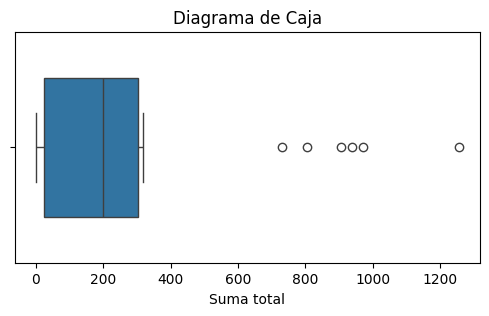

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x=games_platform['sum_total'],width=0.6)
plt.xlabel('Suma total')
plt.title('Diagrama de Caja')
plt.show()

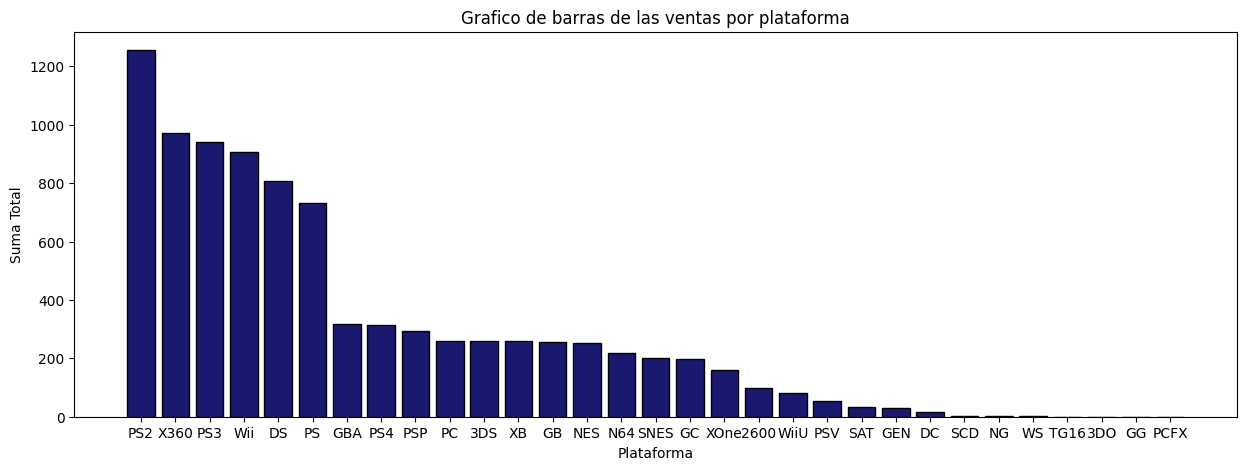

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(games_platform['platform'],games_platform['sum_total'], color='midnightblue', edgecolor='black')
plt.xlabel('Plataforma')
plt.ylabel('Suma Total')
plt.title('Grafico de barras de las ventas por plataforma')
plt.show()

In [ ]:
games_year_platform = games.groupby(['year_of_release','platform'])[list_sales].sum()
games_year_platform = games_year_platform.reset_index()
print(games_year_platform)

     year_of_release platform  na_sales  eu_sales  jp_sales  other_sales  \
0               1979     2600      9.82      0.61      0.00         0.07   
1               1979      3DS      0.84      0.21      0.05         0.09   
2               1979       DS      2.09      0.48      0.55         0.22   
3               1979       GB      0.68      0.31      0.00         0.04   
4               1979      GBA      3.42      0.66      0.77         0.12   
..               ...      ...       ...       ...       ...          ...   
249             2016      PSV      0.15      0.39      3.56         0.15   
250             2016      Wii      0.06      0.11      0.00         0.01   
251             2016     WiiU      2.10      1.48      0.67         0.35   
252             2016     X360      0.69      0.71      0.00         0.12   
253             2016     XOne     14.27      9.63      0.01         2.24   

     sum_total  
0        10.50  
1         1.19  
2         3.34  
3         1.03  
4 

In [ ]:
games_handhelds = games_year_platform.query("year_of_release >= 2013")[['year_of_release', 'platform' ,'sum_total']]
print(games_handhelds.sort_values(by='sum_total', ascending=False))

     year_of_release platform  sum_total
238             2015      PS4     118.90
217             2013      PS3     113.25
228             2014      PS4     100.00
223             2013     X360      88.58
248             2016      PS4      69.25
244             2015     XOne      60.14
214             2013      3DS      56.57
234             2014     XOne      54.07
227             2014      PS3      47.76
225             2014      3DS      43.76
233             2014     X360      34.74
235             2015      3DS      27.78
253             2016     XOne      26.15
218             2013      PS4      25.99
232             2014     WiiU      22.03
222             2013     WiiU      21.65
224             2013     XOne      18.96
237             2015      PS3      16.82
242             2015     WiiU      16.35
245             2016      3DS      15.14
226             2014       PC      13.28
216             2013       PC      12.38
243             2015     X360      11.96
230             

Se hace un filtrado donde escogemos del año 2013 en adelante para visualizar que consolas son las que han tenido mayor venta en los ultimos 5 años

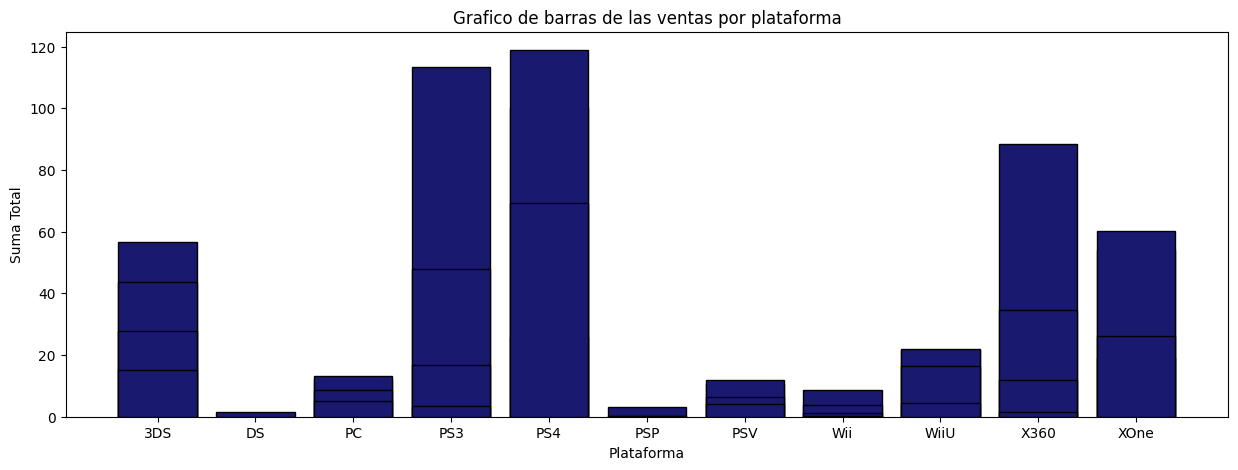

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(games_handhelds['platform'],games_handhelds['sum_total'], color='midnightblue', edgecolor='black')
plt.xlabel('Plataforma')
plt.ylabel('Suma Total')
plt.title('Grafico de barras de las ventas por plataforma')
plt.show()

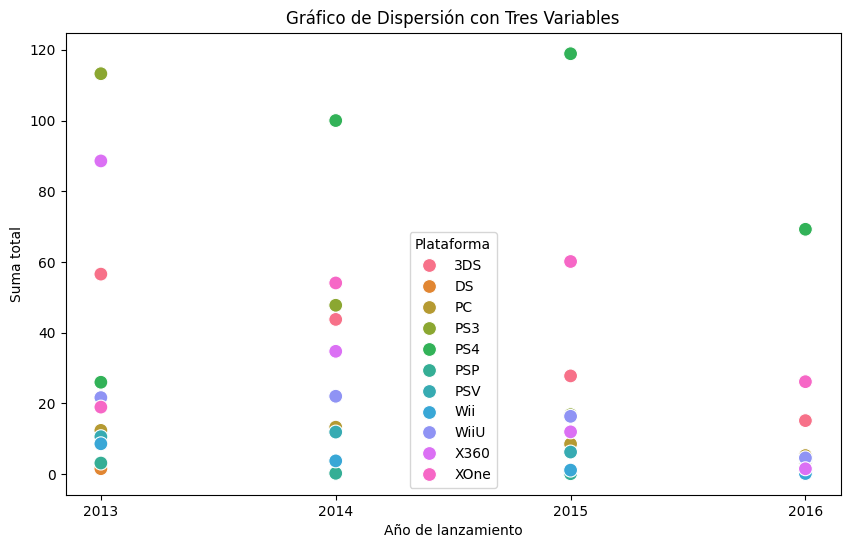

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year_of_release',y='sum_total', hue='platform', data=games_handhelds ,s=100)
plt.xticks(range(2013, 2017))
plt.xlabel('Año de lanzamiento')
plt.ylabel('Suma total')
plt.legend(title='Plataforma')
plt.title('Gráfico de Dispersión con Tres Variables')
plt.show()

En el gráfico anterior podemos interpretar la información:
1. Las consolas de Sony PS4 y PS3 fueron las que mas ventas tuvieron y que estuvieron dentro de un rango de ventas similar durante estos ultimos años, sin embargo, la PS3 decayo en ventas despues del 2013. 
2. La consola de Microsoft, la Xbox One fue la segunda con mas ventas durante estos años, la consola X360 tuvo buenas ventas en el año 2013 pero fue decayendo durante los proximos años, esto puede deberse, que al igual que su competencia la PS3, empezaron a quedarse atras por el lanzamiento de las nuevas consolas de cada compañia .
3.  Mientras que las consolas de Nintendo fueron en general las que menos ventas tuvieron, pero todas las consolas DS, Wii, WiiU se mantuvieron en cuanto a ventas.

De esto, podemos decir que Sony es la compañia que mas vende en cuanto a juegos por plataforma, a pesar de tener rivalidad con las consolas que ofrece Microsoft, el target de estas dos consolas en general es el mismo, mientras que el target de Nintendo es diferente, tal vez podria ser esta la razon del porque las ventas de Nintendo son menores a sus competidores. 

Para seguir con el analisis, escogere la consola de cada plataforma que tuvo mas ventas durante estos años, las cuales sera: PS4, PS3, X360 y XOne.

In [ ]:
list_platform = ['PS4','XOne', 'PS3','X360']
games_name = games.query("platform  in @list_platform")[['name', 'platform' ,'sum_total']]
games_name = games_name.sort_values(by='sum_total', ascending=False)
print(games_name)

                                                    name platform  sum_total
14                                    Kinect Adventures!     X360      21.82
16                                    Grand Theft Auto V      PS3      21.05
23                                    Grand Theft Auto V     X360      16.27
29                        Call of Duty: Modern Warfare 3     X360      14.73
31                             Call of Duty: Black Ops 3      PS4      14.63
...                                                  ...      ...        ...
16185  The Legend of Heroes: Trails in the Sky Third ...      PS3       0.01
16184                      Higurashi no Naku Koro ni Iki      PS3       0.01
16182                  Rocksmith 2014 Edition Remastered     XOne       0.01
16711                                   LMA Manager 2007     X360       0.01
16676                                   G1 Jockey 4 2008      PS3       0.00

[3232 rows x 3 columns]


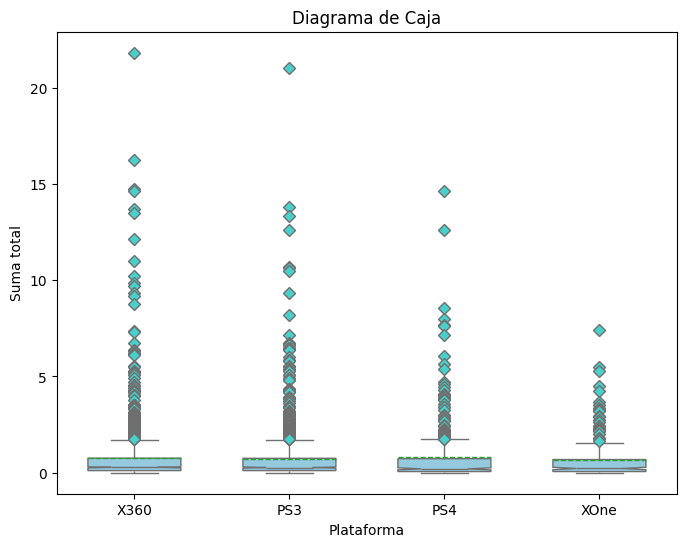

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=games_name['platform'],y=games_name['sum_total'],color='skyblue', width=0.6, showmeans=True, meanline=True ,notch=True, flierprops=dict(markerfacecolor='mediumturquoise', marker='D'))
plt.xlabel('Plataforma')
plt.ylabel('Suma total')
plt.title('Diagrama de Caja')
plt.show()

En el diagrama de cajas anterior, podemos ver que los valores atipicos son los que predominan en las 4 consolas.

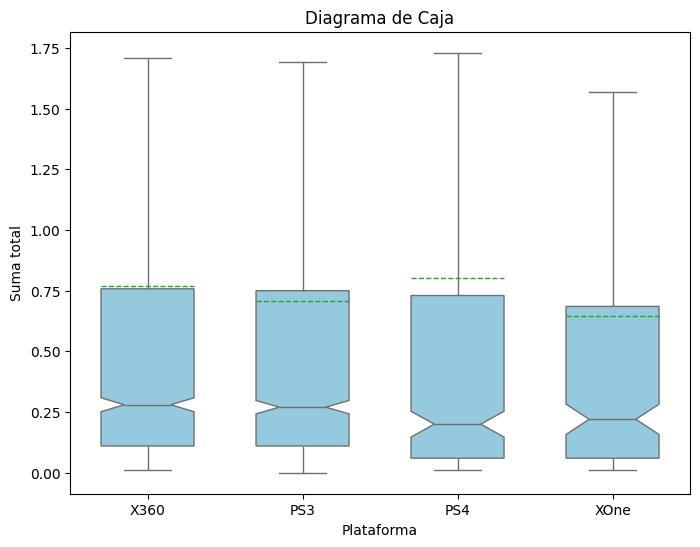

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=games_name['platform'],y=games_name['sum_total'],color='skyblue', width=0.6, showmeans=True, showfliers=False, meanline=True ,notch=True, flierprops=dict(markerfacecolor='mediumturquoise', marker='D'))
plt.xlabel('Plataforma')
plt.ylabel('Suma total')
plt.title('Diagrama de Caja')
plt.show()

En este otro diagrama de cajas, quitamos los valores atipicos para poder ver con mayor exactitud la informacion de cada consola.
1. Nos muestra que el primer cuartil esta casi igual para las consolas X360 y PS3, y casi igual para las otras dos consolas.
2. Con el segundo cuarti pasa lo mismo, donde tenemos las consolas X360 y PS3 iguales y las consolas PS4 y XOne ligeramente similares.
3. El tercer cuartil, se nota la diferencia entre consolas, donde X360 y PS3 tienen similud pero PS4 esta mas arriba que la XOne.
4. La linea discontinua nos muestra la media, la cual es si varia entre cada consola, mientras que la del PS4 y X360 esta por arriba del tercer cuartil, la del XOne y PS3 se mantiene un poco por debajo del tercer cuartil. 


Para analizar los juegos de cada plataforma, se escogeran los primeros 5 juegos con mayores ventas y que tengan relacion alguna con las plataformas.

In [ ]:
games_name_ps4 = games_name.query("platform  == 'PS4'")[['name', 'platform' ,'sum_total']]
games_name_ps4 = games_name_ps4.sort_values(by='sum_total', ascending=False)
print(games_name_ps4.head())

                              name platform  sum_total
31       Call of Duty: Black Ops 3      PS4      14.63
42              Grand Theft Auto V      PS4      12.62
77                         FIFA 16      PS4       8.58
87    Star Wars Battlefront (2015)      PS4       7.98
92  Call of Duty: Advanced Warfare      PS4       7.66


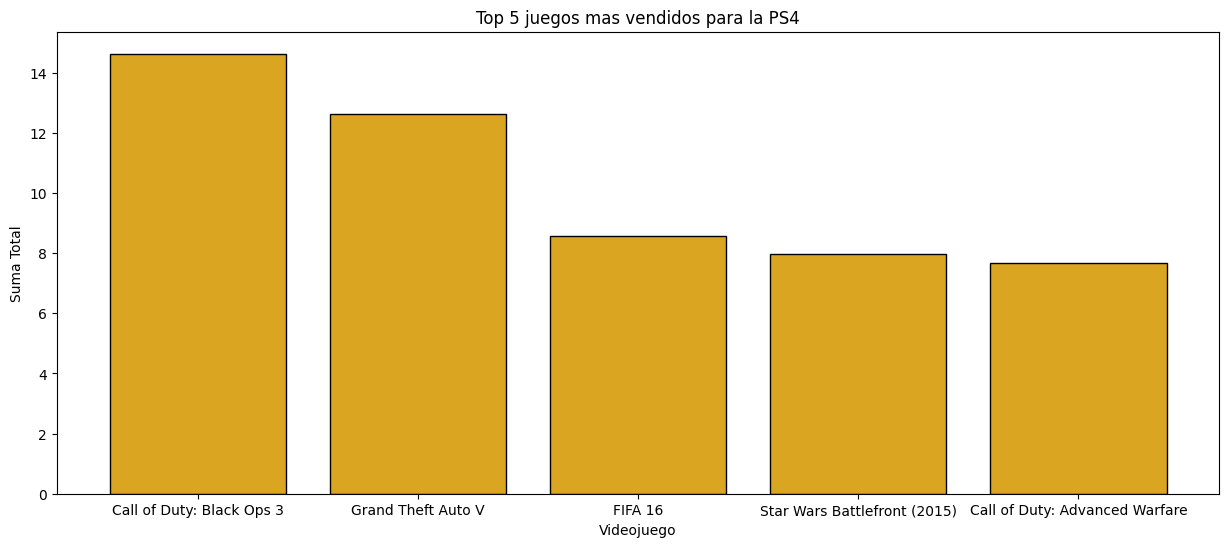

In [ ]:
top_ps4 = games_name_ps4.head(5)
plt.figure(figsize=(15,6))
plt.bar(top_ps4['name'],top_ps4['sum_total'], color='goldenrod', edgecolor='black')
plt.xlabel('Videojuego')
plt.ylabel('Suma Total')
plt.title('Top 5 juegos mas vendidos para la PS4')
plt.show()

In [ ]:
games_name_xone = games_name.query("platform  == 'XOne'")[['name', 'platform' ,'sum_total']]
games_name_xone = games_name_xone.sort_values(by='sum_total', ascending=False)
print(games_name_xone)

                                    name platform  sum_total
99             Call of Duty: Black Ops 3     XOne       7.39
165                   Grand Theft Auto V     XOne       5.47
179       Call of Duty: Advanced Warfare     XOne       5.26
242                    Halo 5: Guardians     XOne       4.49
270                            Fallout 4     XOne       4.22
...                                  ...      ...        ...
16645                             ZombiU     XOne       0.01
16533                Rugby League Live 3     XOne       0.01
16392                     Goat Simulator     XOne       0.01
16508                             Ride 2     XOne       0.01
16182  Rocksmith 2014 Edition Remastered     XOne       0.01

[247 rows x 3 columns]


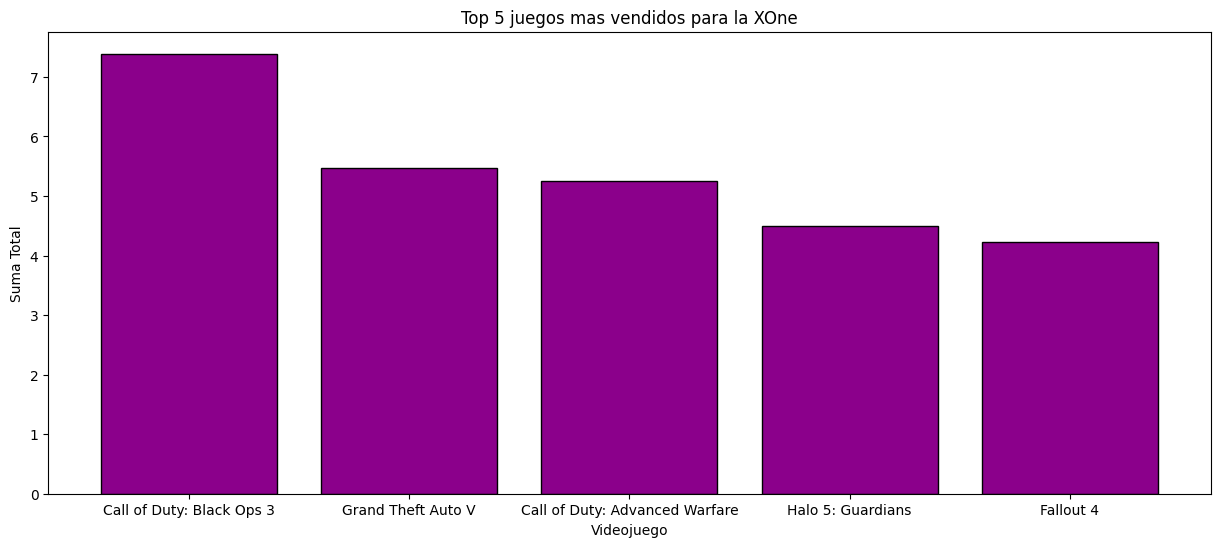

In [ ]:
top_xone = games_name_xone.head(5)
plt.figure(figsize=(15,6))
plt.bar(top_xone['name'],top_xone['sum_total'], color='darkmagenta', edgecolor='black')
plt.xlabel('Videojuego')
plt.ylabel('Suma Total')
plt.title('Top 5 juegos mas vendidos para la XOne')
plt.show()

In [ ]:
games_name_x360 = games_name.query("platform  == 'X360'")[['name', 'platform' ,'sum_total']]
games_name_x360 = games_name_x360.sort_values(by='sum_total', ascending=False)
print(games_name_x360)

                                 name platform  sum_total
14                 Kinect Adventures!     X360      21.82
23                 Grand Theft Auto V     X360      16.27
29     Call of Duty: Modern Warfare 3     X360      14.73
32            Call of Duty: Black Ops     X360      14.62
35         Call of Duty: Black Ops II     X360      13.68
...                               ...      ...        ...
16474      John Daly's ProStroke Golf     X360       0.01
16491                            Ride     X360       0.01
16506        The Godfather (JP sales)     X360       0.01
16505                       Time Leap     X360       0.01
16711                LMA Manager 2007     X360       0.01

[1262 rows x 3 columns]


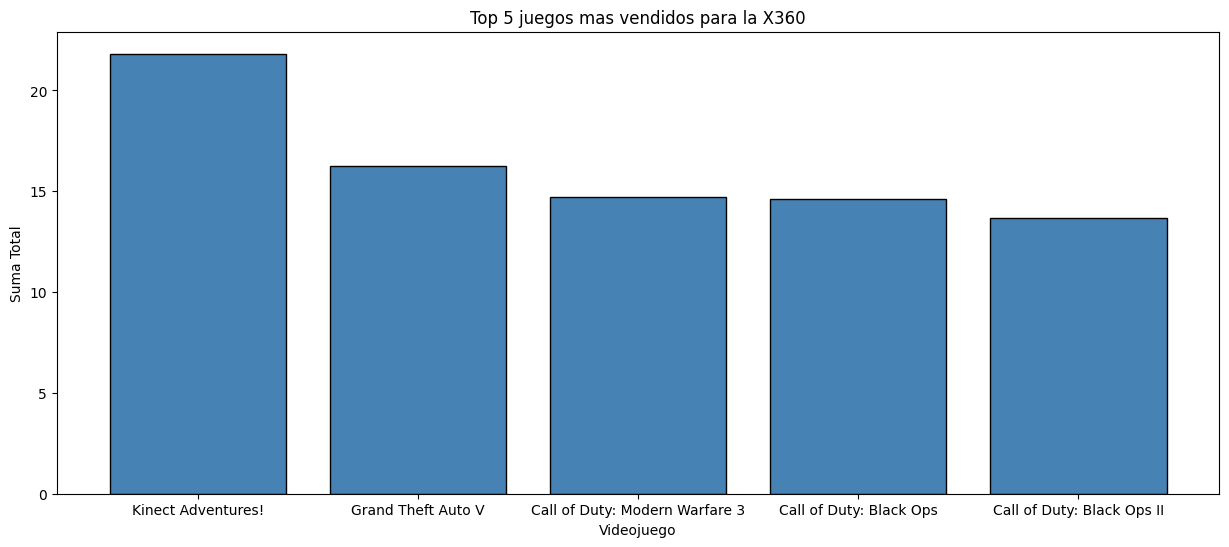

In [ ]:
top_x360 = games_name_x360.head(5)
plt.figure(figsize=(15,6))
plt.bar(top_x360['name'],top_x360['sum_total'], color='steelblue', edgecolor='black')
plt.xlabel('Videojuego')
plt.ylabel('Suma Total')
plt.title('Top 5 juegos mas vendidos para la X360')
plt.show()

In [ ]:
games_name_ps3 = games_name.query("platform  == 'PS3'")[['name', 'platform' ,'sum_total']]
games_name_ps3 = games_name_ps3.sort_values(by='sum_total', ascending=False)
print(games_name_ps3)

                                                    name platform  sum_total
16                                    Grand Theft Auto V      PS3      21.05
34                            Call of Duty: Black Ops II      PS3      13.79
37                        Call of Duty: Modern Warfare 3      PS3      13.33
41                               Call of Duty: Black Ops      PS3      12.63
54                                        Gran Turismo 5      PS3      10.70
...                                                  ...      ...        ...
16628                           Akatsuki no Goei Trinity      PS3       0.01
16581                                Muv-Luv Alternative      PS3       0.01
16558  Naruto Shippuden: Ultimate Ninja Storm Collection      PS3       0.01
16552  Shin Koihime Musou: Otome Taisen * Sangokushi ...      PS3       0.01
16676                                   G1 Jockey 4 2008      PS3       0.00

[1331 rows x 3 columns]


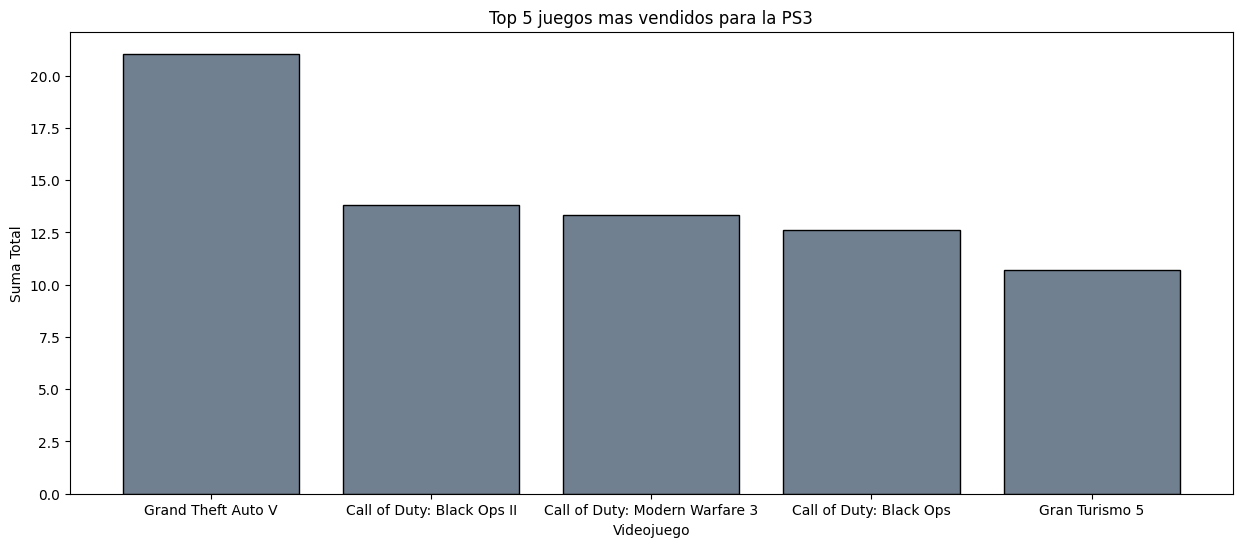

In [ ]:
top_ps3 = games_name_ps3.head(5)
plt.figure(figsize=(15,6))
plt.bar(top_ps3['name'],top_ps3['sum_total'], color='slategray', edgecolor='black')
plt.xlabel('Videojuego')
plt.ylabel('Suma Total')
plt.title('Top 5 juegos mas vendidos para la PS3')
plt.show()

In [ ]:
top_merge = pd.merge(top_ps4, top_xone, on='name',how='outer', suffixes=['_ps4','_xone'])
top_merge = top_merge.merge(top_ps3,on='name',how='outer')
top_merge = top_merge.merge(top_x360,on='name',how='outer', suffixes=['_ps3','_x360'])
print(top_merge)

                              name platform_ps4  sum_total_ps4 platform_xone  \
0        Call of Duty: Black Ops 3          PS4          14.63          XOne   
1               Grand Theft Auto V          PS4          12.62          XOne   
2                          FIFA 16          PS4           8.58           NaN   
3     Star Wars Battlefront (2015)          PS4           7.98           NaN   
4   Call of Duty: Advanced Warfare          PS4           7.66          XOne   
5                Halo 5: Guardians          NaN            NaN          XOne   
6                        Fallout 4          NaN            NaN          XOne   
7       Call of Duty: Black Ops II          NaN            NaN           NaN   
8   Call of Duty: Modern Warfare 3          NaN            NaN           NaN   
9          Call of Duty: Black Ops          NaN            NaN           NaN   
10                  Gran Turismo 5          NaN            NaN           NaN   
11              Kinect Adventures!      

In [ ]:
games_score = games.query("platform == 'PS4'")[['name','critic_score','user_score','sum_total']]
games_score = games_score.sort_values(by='sum_total', ascending=False)
print(games_score)
print(games_score.describe())


                                    name  critic_score  user_score  sum_total
31             Call of Duty: Black Ops 3           NaN        11.0      14.63
42                    Grand Theft Auto V          97.0         8.3      12.62
77                               FIFA 16          82.0         4.3       8.58
87          Star Wars Battlefront (2015)           NaN        11.0       7.98
92        Call of Duty: Advanced Warfare          83.0         5.7       7.66
...                                  ...           ...         ...        ...
15943           Professional Farmer 2016           NaN        11.0       0.01
15864  Rocksmith 2014 Edition Remastered           NaN         7.8       0.01
15839         Mark McMorris Infinite Air          49.0         6.0       0.01
15790                   This War of Mine           NaN        11.0       0.01
16585      Farming 2017 - The Simulation           NaN        11.0       0.01

[392 rows x 4 columns]
       critic_score  user_score   sum_to

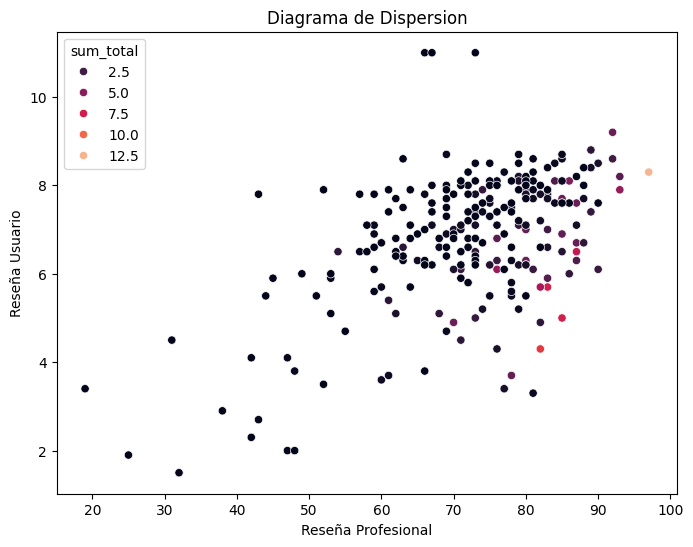

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='critic_score', y='user_score', hue='sum_total', data=games_score, palette='rocket',sizes=(50, 200))
plt.xlabel('Reseña Profesional')
plt.ylabel('Reseña Usuario')
plt.title('Diagrama de Dispersion')
plt.show()

In [ ]:
games_score_corr = games.query("platform == 'PS4'")[['critic_score','user_score','sum_total']]
games_score_corr = games_score_corr.sort_values(by='sum_total', ascending=False)
matriz_correlacion = games_score_corr.corr()
print(matriz_correlacion)

              critic_score  user_score  sum_total
critic_score      1.000000    0.521636   0.406568
user_score        0.521636    1.000000  -0.125580
sum_total         0.406568   -0.125580   1.000000


Podemos ver que la correlacion entre la critica profesional y las ventas es de 0.4, casi cero por lo que indica una relacion positiva casi lineal.
La relacion entre la critica de los usuarios y las ventas da un valor negativo -0.063 aproximado a cero, lo que indica una correlacion negativa, por lo que mientras una aumenta la otra tiende a disminuir.

De hecho, podemos que por ejemplo, COD BO3 no tiene criticas ni profesional ni de los usuarios, y aun asi fue de los juegos mas vendidos en las 4 consolas que estamos analizando. 

In [ ]:
games_name_ps4.head()

,name,platform,sum_total
31,Call of Duty: Black Ops 3,PS4,14.63
42,Grand Theft Auto V,PS4,12.62
77,FIFA 16,PS4,8.58
87,Star Wars Battlefront (2015),PS4,7.98
92,Call of Duty: Advanced Warfare,PS4,7.66


In [ ]:
games_list = [ 'Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16' ,'Star Wars Battlefront (2015)' ,'Call of Duty: Advanced Warfare']
games_top_xone = games_name_xone.query('name in @games_list')[['name','sum_total']]
print(games_top_xone)

                               name  sum_total
99        Call of Duty: Black Ops 3       7.39
165              Grand Theft Auto V       5.47
179  Call of Duty: Advanced Warfare       5.26
342    Star Wars Battlefront (2015)       3.66
417                         FIFA 16       3.25


In [ ]:
games_top_x360 = games_name_x360.query('name in @games_list')[['name','sum_total']]
print(games_top_x360)

                                name  sum_total
23                Grand Theft Auto V      16.27
263   Call of Duty: Advanced Warfare       4.28
1049       Call of Duty: Black Ops 3       1.70
1182                         FIFA 16       1.57


In [ ]:
games_top_ps3 = games_name_ps3.query('name in @games_list')[['name','sum_total']]
print(games_top_ps3)

                                name  sum_total
16                Grand Theft Auto V      21.05
255   Call of Duty: Advanced Warfare       4.36
552                          FIFA 16       2.70
1062       Call of Duty: Black Ops 3       1.69


Comparando las ventas del top 5 juegos mas vendidos por la consola PS4, donde el top de juegos son: 
1. Call of Duty: Black Ops
2. Grand Theft Auto V
3. Star Wars Battlefront
4. FIFA 16
5.Call of Duty: Advanced Warfare

Se concluye que:
1. COD: BO3 se tiene en las 4 consolas donde en la consola PS4 se tuvieron mayores ventas y en la PS3 donde se tuvo las menores ventas de este videojuego.
2. El GTA V es el juego que comparten en el top las 4 consolas, donde en la PS3 se tuvo las mayores ventas y en el XOne las menores ventas, sin embargo, es el juego mas vendido entre las 4 consolas.
3. Star Wars Battlefront solo la tienen la consola PS4 y XOne, donde la consola XOne tuvo las menores ventas.
4. FIFA 16 fue el mas vendido en la consola PS4.
5. COD: Advanced Warfare fue el mas vendido en el X360.

In [ ]:
games_genre = games.groupby(['platform','genre'])['sum_total'].sum()
games_genre =games_genre.reset_index()
print(games_genre)

    platform         genre  sum_total
0       2600        Action      29.25
1       2600     Adventure       1.70
2       2600      Fighting       1.24
3       2600          Misc       3.57
4       2600      Platform      13.26
..       ...           ...        ...
289     XOne  Role-Playing      10.55
290     XOne       Shooter      60.33
291     XOne    Simulation       0.69
292     XOne        Sports      26.74
293     XOne      Strategy       0.42

[294 rows x 3 columns]


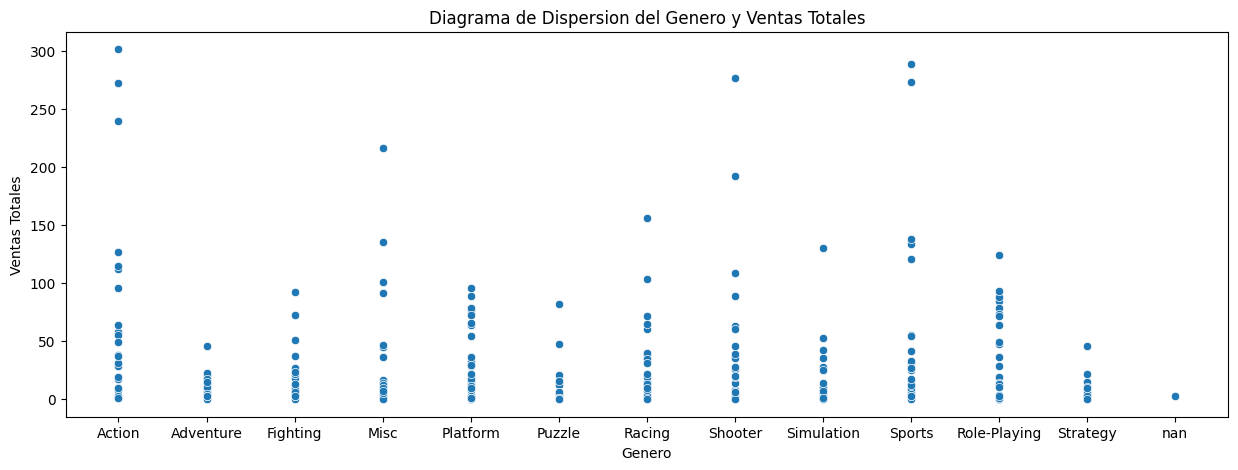

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='genre', y='sum_total',  data=games_genre, sizes=(50, 200))
plt.xlabel('Genero')
plt.ylabel('Ventas Totales')
plt.title('Diagrama de Dispersion del Genero y Ventas Totales')
plt.show()


En el grafico de Genero y Ventas, podemos ver que el genero mas rentable es de Action, junto con Sports y Shooter, mientras que los menos rentables son Strategy, Adventure y Puzzle.

Si vemos el top 5 de juegos mas vendidos, vemos que el juego COD:BO3 es del genero Shooter.

In [ ]:
agg_region = {'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'}
genre_region = games.groupby(['genre'])
genre_region = genre_region.agg(agg_region)
print(genre_region.sort_values(by='na_sales', ascending=False).head(5))
print(genre_region.sort_values(by='eu_sales', ascending=False).head(5))
print(genre_region.sort_values(by='jp_sales', ascending=False).head(5))

          na_sales  eu_sales  jp_sales
genre                                 
Action      879.01    519.13    161.43
Sports      684.43    376.79    135.54
Shooter     592.24    317.34     38.76
Platform    445.50    200.35    130.83
Misc        407.27    212.74    108.11
         na_sales  eu_sales  jp_sales
genre                                
Action     879.01    519.13    161.43
Sports     684.43    376.79    135.54
Shooter    592.24    317.34     38.76
Racing     359.35    236.51     56.71
Misc       407.27    212.74    108.11
              na_sales  eu_sales  jp_sales
genre                                     
Role-Playing    330.81    188.71    355.41
Action          879.01    519.13    161.43
Sports          684.43    376.79    135.54
Platform        445.50    200.35    130.83
Misc            407.27    212.74    108.11


Podemos ver que cada tabla nos muestra que genero fue el más vendido en esa región. 
Para la region de NorteAmerica, el genero Action fue el mas vendido mientras que en la región de Japón este genero fue el de menor ventas.
Para la región de Europa, tambien fue el genero de Action el que tuvo mayores ventas y de igual forma en Japón fue donde menor venta tuvo.
Para la región de Japón, el que tuvo mayores ventas fue el Role-Playing, para este genero la region de Europa fue donde menor venta hubo.

In [ ]:
genre_region = games.groupby(['platform'])
genre_region = genre_region.agg(agg_region)
print(genre_region.sort_values(by='na_sales', ascending=False).head(5))
print(genre_region.sort_values(by='eu_sales', ascending=False).head(5))
print(genre_region.sort_values(by='jp_sales', ascending=False).head(5))

          na_sales  eu_sales  jp_sales
platform                              
X360        602.47    270.76     12.43
PS2         583.84    339.29    139.20
Wii         496.90    262.21     69.33
PS3         393.49    330.29     80.19
DS          382.40    188.89    175.57
          na_sales  eu_sales  jp_sales
platform                              
PS2         583.84    339.29    139.20
PS3         393.49    330.29     80.19
X360        602.47    270.76     12.43
Wii         496.90    262.21     69.33
PS          336.52    213.61    139.82
          na_sales  eu_sales  jp_sales
platform                              
DS          382.40    188.89    175.57
PS          336.52    213.61    139.82
PS2         583.84    339.29    139.20
SNES         61.23     19.04    116.55
3DS          83.49     61.48    100.67


En cuanto a plataforma, en la región de NA la plataforma con mayores ventas fue el X360, y donde hubo menor venta fue en la region de JP.
En la región de EU fue la plataforma PS2 la que tuvo mayores ventas, de igual forma, JP fue donde hubo menor venta.
Para la región JP, la consola DS tuvo mayores ventas y en la región EU fue donde menor venta tuvo esta plataforma.

In [ ]:
genre_region = games.groupby(['rating'])
genre_region = genre_region.agg(agg_region)
print(genre_region.sort_values(by='na_sales', ascending=False).head(5))
print(genre_region.sort_values(by='eu_sales', ascending=False).head(5))
print(genre_region.sort_values(by='jp_sales', ascending=False).head(5))

        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
nan      1242.46    613.83    841.96
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
nan      1242.46    613.83    841.96
M         748.48    483.97     64.24
T         759.75    427.03    151.40
E10+      353.32    188.52     40.20
        na_sales  eu_sales  jp_sales
rating                              
nan      1242.46    613.83    841.96
E        1292.99    710.25    198.11
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20


Para el rating, tenemos valores NaN los cuales sesgan nuestro analasis, no se tomaran en cuenta, asi que la clasificacion E, que es la que es apta para toddo publico, es la que tuvo mayores ventas en las 3 regiones.

En general, viendo los datos por region, el rating no afecta directamente a la venta de los juegos. Las 3 regiones comparten varios generos con ventas que difieren bastante de una region a otra. Tambien podemos observar que el tipo de consola que tiene mayor venta de videojuegos es diferente, mientras que en NA es la consola creada por Microsoft, una empresa que tiene sus raices dentro del mercado norteamericano. Despues, la region de EU, donde la consola de Sony es la que mayores ventas tiene y donde Sony ha enfocado mas su mercadotecnia, por ultimo, la consola de Nintendo, una empresa creada en Japon y donde se concentra la mayoria de sus ventas.

In [ ]:
list_platform = ['XOne','PC']
platform_score = games.query('platform in @list_platform & user_score != 11.0')[['platform','user_score']]
platform_score = platform_score.groupby('platform')['user_score'].mean()
platform_score = platform_score.reset_index()
platform_score = platform_score.dropna()
print(platform_score)

  platform  user_score
0       PC    7.062468
1     XOne    6.521429


In [639]:
alpha = 0.05
mean_xone = platform_score[platform_score['platform']=='XOne']['user_score']
print(mean_xone)
mean_pc = platform_score[platform_score['platform']=='PC']['user_score']
print(mean_pc)
results = st.ttest_ind(mean_xone, mean_pc) 

print('valor p: ', results.pvalue)
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

1    6.521429
Name: user_score, dtype: float64
0    7.062468
Name: user_score, dtype: float64
valor p:  nan
No podemos rechazar la hipótesis nula


In [ ]:
list_genre = ['Action','Sports']
genre_score = games.query('genre in @list_genre')[['genre','user_score']]
genre_score = genre_score.dropna()
genre_score = genre_score.groupby('genre')['user_score'].mean()
genre_score = genre_score.reset_index()
print(genre_score)

    genre  user_score
0  Action    8.856604
1  Sports    9.102726


In [ ]:
alpha = 0.05
mean_action= genre_score[genre_score['genre']=='Action']['user_score']
print(mean_action)
mean_sports = genre_score[genre_score['genre']=='Sports']['user_score']
print(mean_sports)
results = st.ttest_ind(mean_action, mean_sports) 

print('valor p: ', results.pvalue)
if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

0    8.856604
Name: user_score, dtype: float64
1    9.102726
Name: user_score, dtype: float64
valor p:  nan
No podemos rechazar la hipótesis nula
